In [1]:
library(Seurat)

# Load the Haber full dataset
haber.data <- Read10X(data.dir = "/home/ucsd-train27/scratch/projects/haber_batch1/cellranger_results/Atlas1_batch1/outs/filtered_gene_bc_matrices/mm10")

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave

Loading required package: Matrix


In [2]:
dim(haber.data)

[1] 27998  1595

In [3]:
# Initialize the Seurat object with the raw (non-normalized data).  Keep all
# genes expressed in >= 80 cells (~5% of the data). Keep all cells with at
# least 200 detected genes
haber <- CreateSeuratObject(raw.data = haber.data, min.cells = 80 , min.genes = 200)

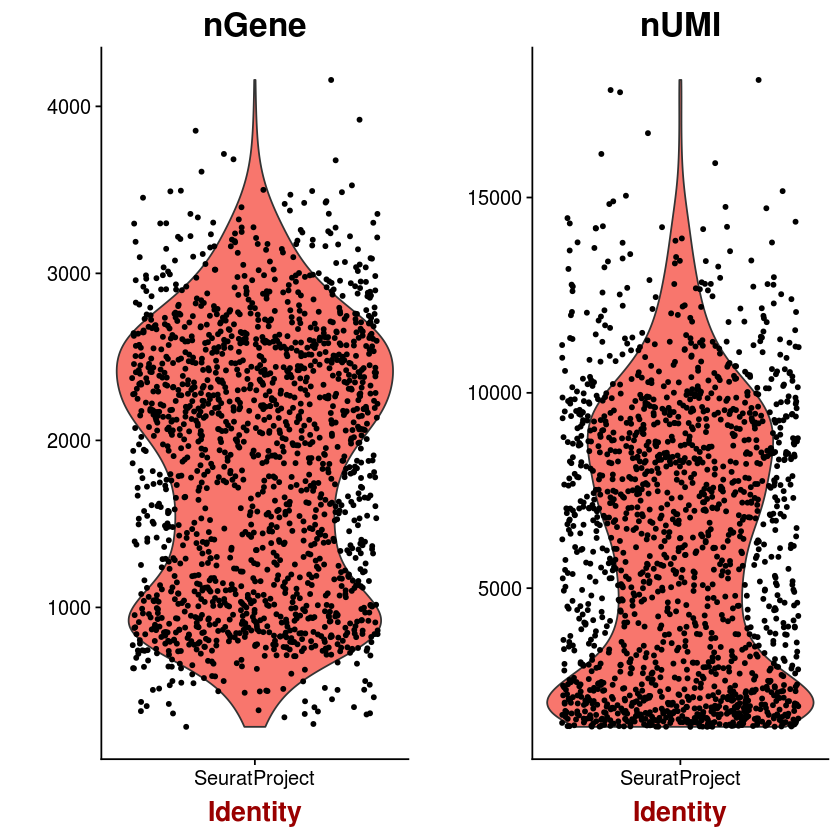

In [5]:
# The number of genes and UMIs (nGene and nUMI) are automatically calculated
# for every object by Seurat.  
VlnPlot(object = haber, features.plot = c("nGene", "nUMI"), nCol = 2)

#you can also plot mitochondrial genes

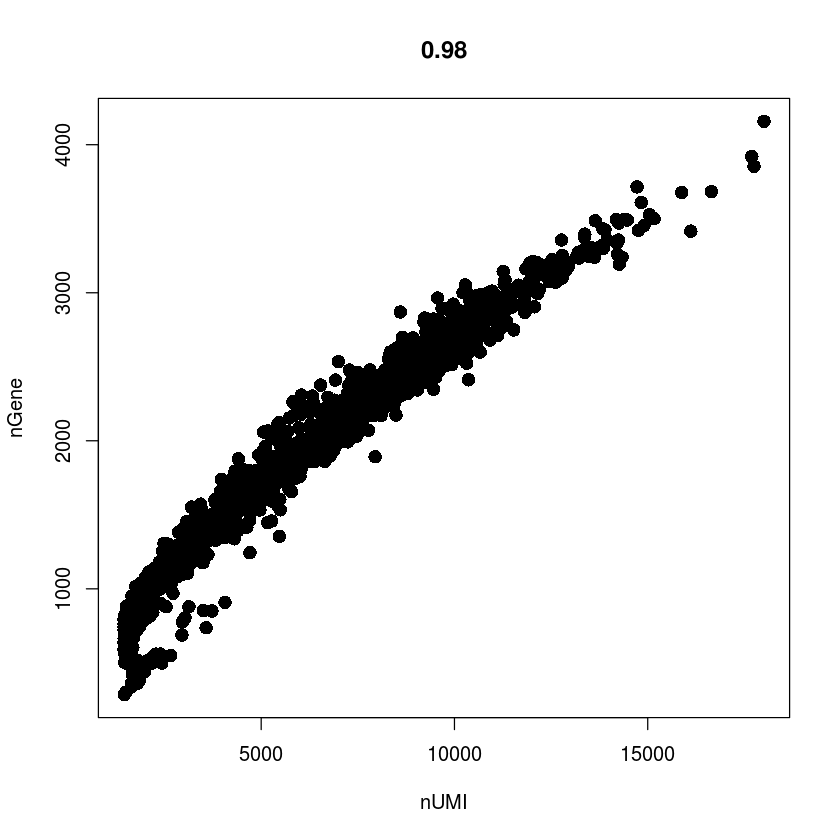

In [6]:
# GenePlot is typically used to visualize gene-gene relationships, but can
# be used for anything calculated by the object, i.e. columns in
# object@meta.data, PC scores etc.  We can filter low UMI
GenePlot(object = haber, gene1 = "nUMI", gene2 = "nGene")

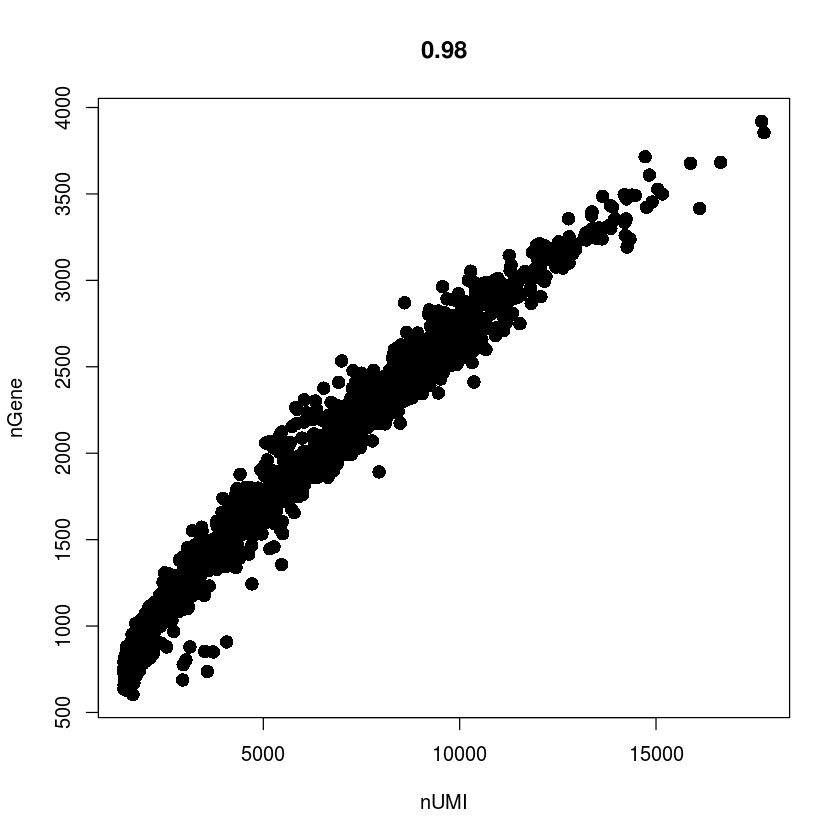

In [7]:
# We filter out cells that have unique gene counts over 2,500 or less than
# 200 Note that low.thresholds and high.thresholds are used to define a
# 'gate'.  -Inf and Inf should be used if you don't want a lower or upper
# threshold.
haber <- FilterCells(object = haber, subset.names = c("nGene"), 
    low.thresholds = c(600), high.thresholds = c(4000))
GenePlot(object = haber, gene1 = "nUMI", gene2 = "nGene")

In [8]:
#normalizing the data
haber <- NormalizeData(object = haber, normalization.method = "LogNormalize", 
    scale.factor = 10000)

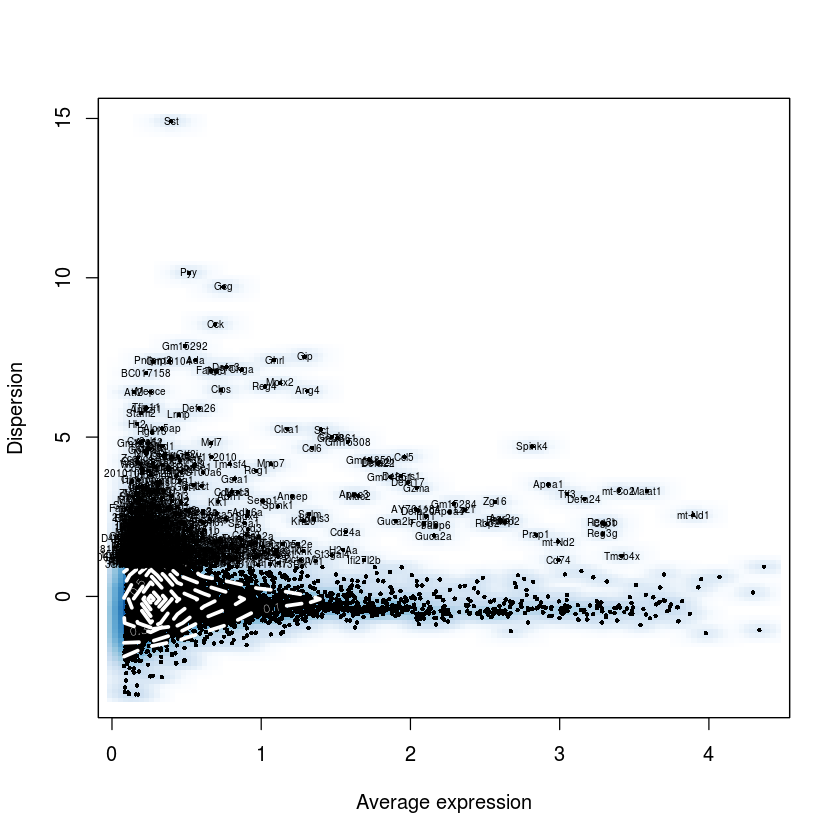

In [9]:
#find variable genes
haber <- FindVariableGenes(object = haber)

In [10]:
#check how many variable genes were defined
length(x = haber@var.genes)

[1] 774

In [11]:
#scaling data and removing unwanted source of variation
haber <- ScaleData(object = haber, vars.to.regress = c("nUMI"))

Regressing out: nUMI



Time Elapsed:  1.0248237212499 mins

Scaling data matrix


In [12]:
#perform PCA
haber <- RunPCA(object = haber, pc.genes = haber@var.genes, do.print = TRUE, pcs.print = 1:5, 
    genes.print = 5)

[1] "PC1"
[1] "Tmsb4x"   "Cd24a"    "Dctpp1"   "Sox4"     "Ceacam10"
[1] ""
[1] "Apoc3"  "Rbp2"   "Anpep"  "Apoa1"  "Spink1"
[1] ""
[1] ""
[1] "PC2"
[1] "Prap1"         "Cd74"          "Dctpp1"        "2810417H13Rik"
[5] "mt-Nd1"       
[1] ""
[1] "Selm"   "Ccl6"   "Muc2"   "Spink4" "Tff3"  
[1] ""
[1] ""
[1] "PC3"
[1] "Gm7861"   "Defa-rs1" "Defa26"   "Gm10104"  "Defa17"  
[1] ""
[1] "Tuba1a"  "Tm4sf4"  "Aplp1"   "Kctd12"  "Fam183b"
[1] ""
[1] ""
[1] "PC4"
[1] "Tpsg1"  "Clca1"  "S100a6" "Fcgbp"  "Lrrc26"
[1] ""
[1] "Gm7861"   "Defa-rs1" "Gm14851"  "Gm14850"  "Gm10104" 
[1] ""
[1] ""
[1] "PC5"
[1] "Lrmp"    "Alox5ap" "Rgs13"   "Ltc4s"   "Kctd12" 
[1] ""
[1] "Aplp1"   "Chgb"    "Fam183b" "Chga"    "Gch1"   
[1] ""
[1] ""
